In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

# Tratamento dos dados

In [2]:
df = pd.read_csv("calibration_data.tsv", delimiter="\t")
df.drop_duplicates(inplace=True)
df = df[df.temperature!=0]
df.drop(columns=["time"], inplace=True)
df.head()

,temperature,resistance
2,22.375,11383.824
4,22.375,11372.669
5,22.375,11350.381
6,22.375,11328.147
7,22.375,11383.824


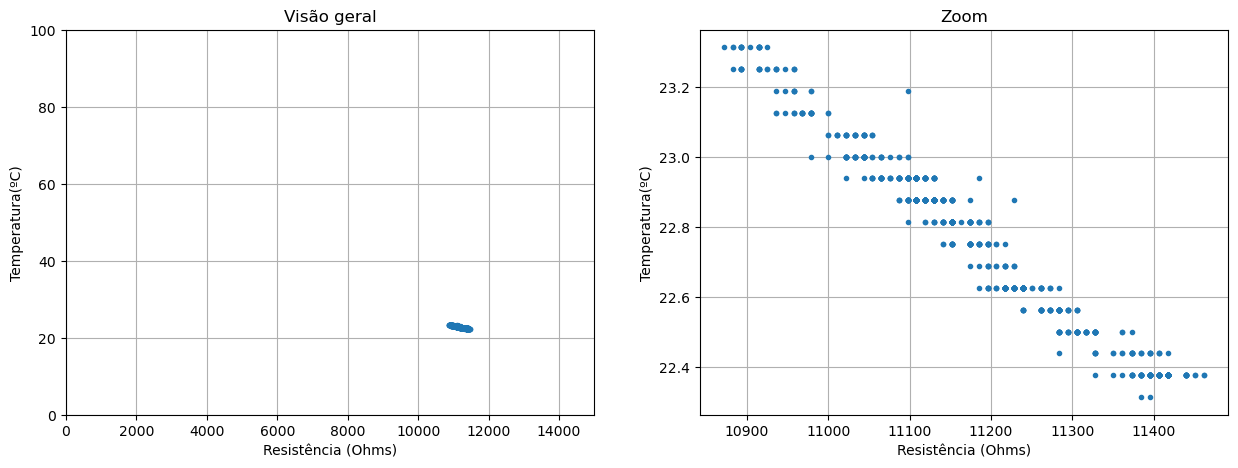

In [3]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.ylim(0,100)
plt.ylabel("Temperatura(ºC)")
plt.xlim(0, 15_000)
plt.xlabel("Resistência (Ohms)")
plt.plot(df.resistance, df.temperature, '.')
plt.grid()
plt.title("Visão geral")

plt.subplot(1,2,2)
plt.ylabel("Temperatura(ºC)")
plt.xlabel("Resistência (Ohms)")
plt.plot(df.resistance, df.temperature, '.')
plt.title("Zoom")
plt.grid()
plt.show()

# Modelo Linear

In [4]:
model = LinearRegression()

X = df.resistance.to_numpy().reshape((-1,1))
y = df.temperature.to_numpy()

model.fit(X,y)

print(f"T = {model.coef_[0]:.2e}*R + {model.intercept_:.2e}")

T = -1.80e-03*R + 4.29e+01


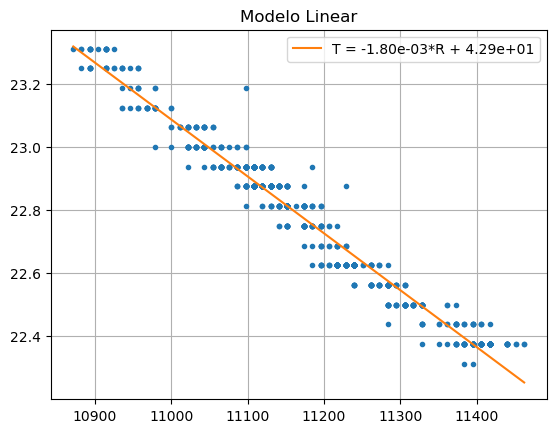

In [5]:
R = np.linspace(df.resistance.min(), df.resistance.max()).reshape((-1,1))

plt.plot(df.resistance, df.temperature, '.')
plt.plot(R, model.predict(R), label=f"T = {model.coef_[0]:.2e}*R + {model.intercept_:.2e}")
plt.title("Modelo Linear")
plt.legend()
plt.grid()
plt.show()

# Steinhart–Hart

In [6]:
X = [(np.log(r), np.log(r)**3) for r in df.resistance]
X = np.array(X)
X.shape

(840, 2)

In [7]:
y = np.array(1/df.temperature.to_numpy())
y.shape

(840,)

In [8]:
model_sh = LinearRegression()
model_sh.fit(X,y)

print(f"1/T = {model_sh.coef_[0]:.2e}*ln(R) + {model_sh.coef_[1]:.2e}*(ln(R))^3 + {model_sh.intercept_:.2e}")

1/T = 7.03e-01*ln(R) + -2.55e-03*(ln(R))^3 + -4.45e+00


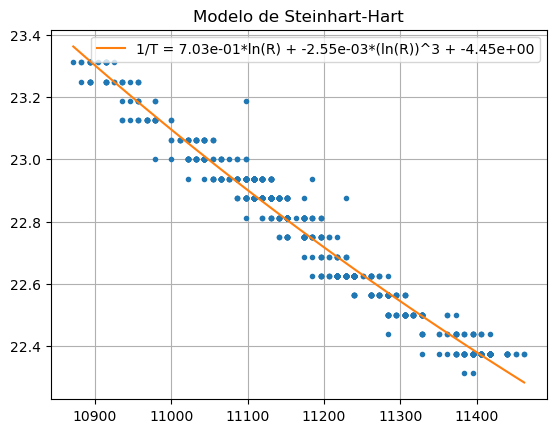

In [9]:
R = np.linspace(df.resistance.min(), df.resistance.max())
R_sh = np.array([(np.log(r), np.log(r)**3) for r in R])

plt.plot(df.resistance, df.temperature, '.')
plt.plot(R, 1/model_sh.predict(R_sh), label=f"1/T = {model_sh.coef_[0]:.2e}*ln(R) + {model_sh.coef_[1]:.2e}*(ln(R))^3 + {model_sh.intercept_:.2e}")
plt.title("Modelo de Steinhart-Hart")
plt.legend()
plt.grid()
plt.show()

# Comparação

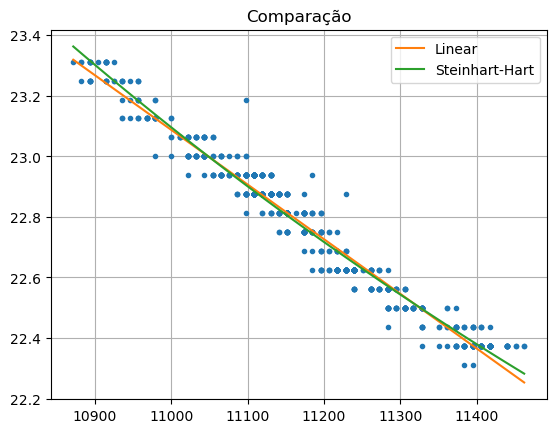

In [10]:
R = np.linspace(df.resistance.min(), df.resistance.max())
R_sh = np.array([(np.log(r), np.log(r)**3) for r in R])

plt.plot(df.resistance, df.temperature, '.')
plt.plot(R, model.predict(R.reshape((-1,1))), label="Linear")
plt.plot(R, 1/model_sh.predict(R_sh), label="Steinhart-Hart")
plt.title("Comparação")
plt.legend()
plt.grid()
plt.show()